In [ ]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns
import pymc as pm
import arviz as az

## Problem 1: the volume of a random cube
A standard six-sided die is rolled, and the result is used to define the side length $X$ (in meters) of a perfect cube. The die is fair, so the side length $X$ can take on the integer values $\{1, 2, 3, 4, 5, 6\}$, each with equal probability.The Volume of the cube, $V$, is a function of the side length $X$, specifically: $V = X^3$. Your task is to determine the complete probability distribution of the cube's volume, $V$.

### 📝 Part 1: Analytical Solution (The Transformation)
1.1. Distribution of the Side Length ($X$)

A. State the Probability Mass Function (PMF), $P_X(x)$, for the side length $X$.

B. Calculate the Expected Side Length, $E[X]$.

C. Calculate the Variance of the Side Length, $Var[X]$.

---
1.2. Distribution of the Volume ($V$)
The volume $V$ is a transformation of $X$ given by $V = g(X) = X^3$.

A. Determine the possible values that the Volume $V$ can take.

B. Determine the Probability Mass Function (PMF), $P_V(v)$, for the volume $V$. (Since $g(X)$ is a one-to-one transformation for positive integers, this should be straightforward).

C. Calculate the Expected Volume, $E[V]$.

D. Calculate the Variance of the Volume, $Var[V]$.

E. Question: Is $E[V]$ equal to $(E[X])^3$? Explain why or why not, based on your calculations.


In [54]:
mean_x = 7 / 2
variance_x = 35 / 12

# x_dist = ss.randint(low=1, high=7)
x_dist = ss.uniform(10, 12)

In [55]:
x_samples = x_dist.rvs(size=1_000_000)

print(
    f"Analytical mean = {mean_x}; "
    f"Computational mean = {np.mean(x_samples)}; "
    f"Actual mean = {x_dist.mean()}\n\n"
    f"Analytical variance = {variance_x:.5f}; "
    f"Computational variance = {np.var(x_samples):.5f}; "
    f"Actual variance = {x_dist.var():.5f}"
)

Analytical mean = 3.5; Computational mean = 16.00285126688698; Actual mean = 16.0

Analytical variance = 2.91667; Computational variance = 11.99945; Actual variance = 12.00000


In [56]:
g = lambda x: x**3

mean_y = sum(map(g, range(1, 7))) / 6
variance_y = (sum(map(lambda x: g(x) ** 2, range(1, 7))) / 6) - mean_y**2

y_samples = g(x_samples)

In [57]:
print(
    f"Analytical mean = {mean_y}; "
    f"Computational mean = {np.mean(y_samples)}\n\n"
    f"Analytical variance = {variance_y:.5f}; "
    f"Computational variance = {np.var(y_samples):.5f}; "
)

Analytical mean = 73.5; Computational mean = 4674.225905943336

Analytical variance = 5792.91667; Computational variance = 7749770.61917; 


In [58]:
third_moment_x = (sum(range(1, 7)) ** 3) / 6

print(f"E(x) ** 3 = {third_moment_x}")

E(x) ** 3 = 1543.5


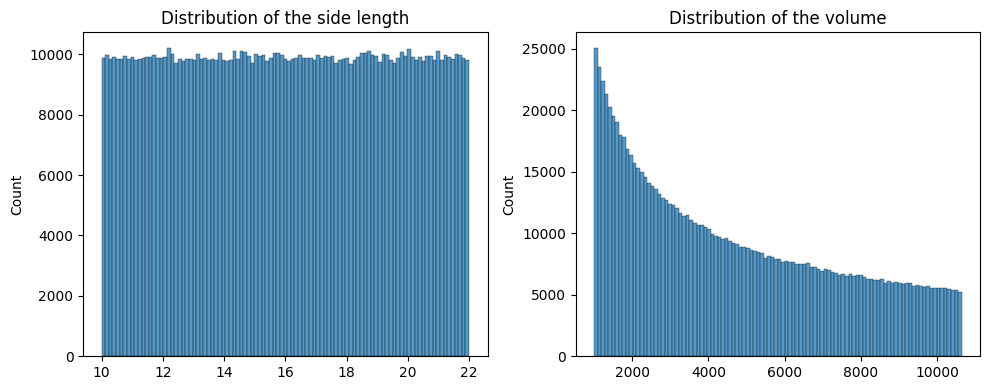

In [59]:
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

sns.histplot(x=x_samples, label="Distribution of X", ax=ax1)
sns.histplot(x=y_samples, label="Distribution of V", ax=ax2)

ax1.set_title("Distribution of the side length")
ax2.set_title("Distribution of the volume")

plt.tight_layout()
plt.show()

In [64]:
with pm.Model() as model:
    x = pm.Uniform("side", lower=10, upper=12)
    v = pm.Deterministic("volume", g(x))

    trace = pm.sample(20_000)

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [side]


Output()

Sampling 4 chains for 1_000 tune and 20_000 draw iterations (4_000 + 80_000 draws total) took 7 seconds.


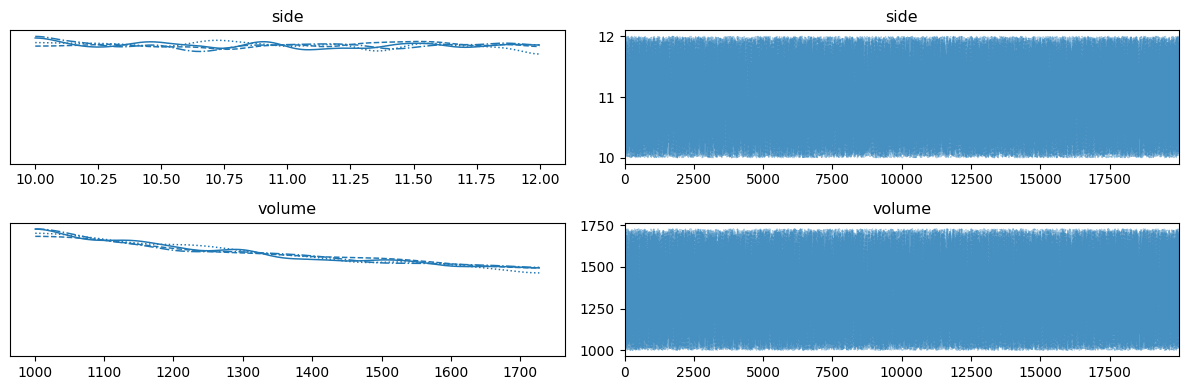

In [65]:
az.plot_trace(trace)
plt.tight_layout()
plt.show()

In [66]:
trace.posterior["volume"].mean()

<xarray.DataArray 'volume' ()> Size: 8B
array(1340.95248169)

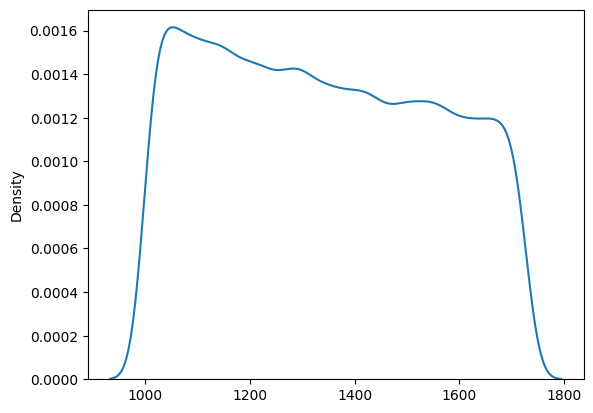

In [ ]:
sns.kdeplot(x=trace.posterior["volume"].values.reshape(-1))
plt.show()